In [1]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd
import numpy as np
from math import sqrt

Load Data

In [2]:
tv = TvDatafeed()
print('')

df = tv.get_hist(symbol='SET:SET50', exchange='SET', interval=Interval.in_monthly, n_bars=22)
set50 = df[['close']]
set50.rename(columns = {'close':'set50'}, inplace=True)

name = ['SET:ADVANC', 'SET:AOT', 'SET:AWC', 'SET:BANPU', 'SET:BBL', 'SET:BDMS', 'SET:BEM', 'SET:BGRIM', 'SET:BH', 'SET:BTS', 'SET:CBG', 'SET:CENTEL', 'SET:COM7', 'SET:CPALL', 'SET:CPF', 'SET:CPN', 'SET:CRC', 'SET:DELTA', 'SET:EA', 'SET:EGCO', 'SET:GLOBAL', 'SET:GPSC', 'SET:GULF', 'SET:HMPRO', 'SET:INTUCH', 'SET:IVL', 'SET:KBANK', 'SET:KCE', 'SET:KTB', 'SET:KTC', 'SET:LH', 'SET:MINT', 'SET:MTC', 'SET:OR', 'SET:OSP', 'SET:PTT', 'SET:PTTEP', 'SET:PTTGC', 'SET:RATCH', 'SET:SAWAD', 'SET:SCB', 'SET:SCC', 'SET:SCGP', 'SET:TISCO', 'SET:TOP', 'SET:TRUE', 'SET:TTB', 'SET:TU', 'SET:WHA', 'SET:TLI']

#load all set50 data
for i in range (len(name)):
    df = tv.get_hist(symbol=name[i], exchange='SET', interval=Interval.in_monthly, n_bars=22)
    df = df[['close']]
    set50 = pd.merge(set50, df, left_index=True, right_index=True, how='outer')
    set50.rename(columns = {'close':name[i]}, inplace=True)
#print(set50)

df_return = set50.pct_change() * 100
#drop nan based on stocks with the least histirical data
df_return = df_return.dropna()
#print(df_return)

you are using nologin method, data you access may be limited


C:\Users\Inv_edg\AppData\Local\Temp\ipykernel_26276\3326727273.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set50.rename(columns = {'close':'set50'}, inplace=True)


Sharpe Calculation from Average Return

In [3]:
#data of the current month assumes price closes at current price
mean_list = []
std_list = []

for i in range (len(name)):
    mean = df_return[name[i]].mean() * 12
    mean_list.append(mean)
    std = df_return[name[i]].std() * sqrt(12)
    std_list.append(std)

rf = 2.269432

#currently there is a problem with real-time data on tradingview, when the problem is fixed, use the code below instead of typing risk-free rate manually

############rfr = tv.get_hist(symbol='TVC:TH01Y', exchange='TVC', interval=Interval.in_monthly, n_bars=1)
############rf = rfr['close'][0]

print(rf)
conclu = pd.DataFrame(name, columns=['SET50'])
conclu['avg_return'] = np.array(mean_list)
conclu['std'] = np.array(std_list)
conclu['rrf'] = rf
conclu['sharpe'] = (conclu['avg_return']-conclu['rrf'])/conclu['std']
conclu = conclu.sort_values(by=['sharpe'])

2.269432


In [4]:
neg = conclu[conclu['sharpe'] < 0]
#print("Stocks that underperform the risk-free rate:")
#print(neg[['SET50','sharpe']])

# Print stocks with positive Sharpe ratio
pos = conclu[conclu['sharpe'] >= 0]
print("\nStocks that outperformed risk-free rate:")
print(pos[['SET50','sharpe']])


Stocks that outperformed risk-free rate:
         SET50    sharpe
5     SET:BDMS  0.049074
40     SET:SCB  0.071400
28     SET:KTB  0.096309
11  SET:CENTEL  0.102384
4      SET:BBL  0.182422
44     SET:TOP  0.312792
43   SET:TISCO  0.411327
8       SET:BH  0.485743
17   SET:DELTA  0.631502
45    SET:TRUE  0.664391
48     SET:WHA  1.178097
46     SET:TTB  1.196214


In [5]:
good = conclu[conclu['sharpe'] >= 1]
print("\nStocks with acceptable performance:")
print(good[['SET50','sharpe']])


Stocks with acceptable performance:
      SET50    sharpe
48  SET:WHA  1.178097
46  SET:TTB  1.196214


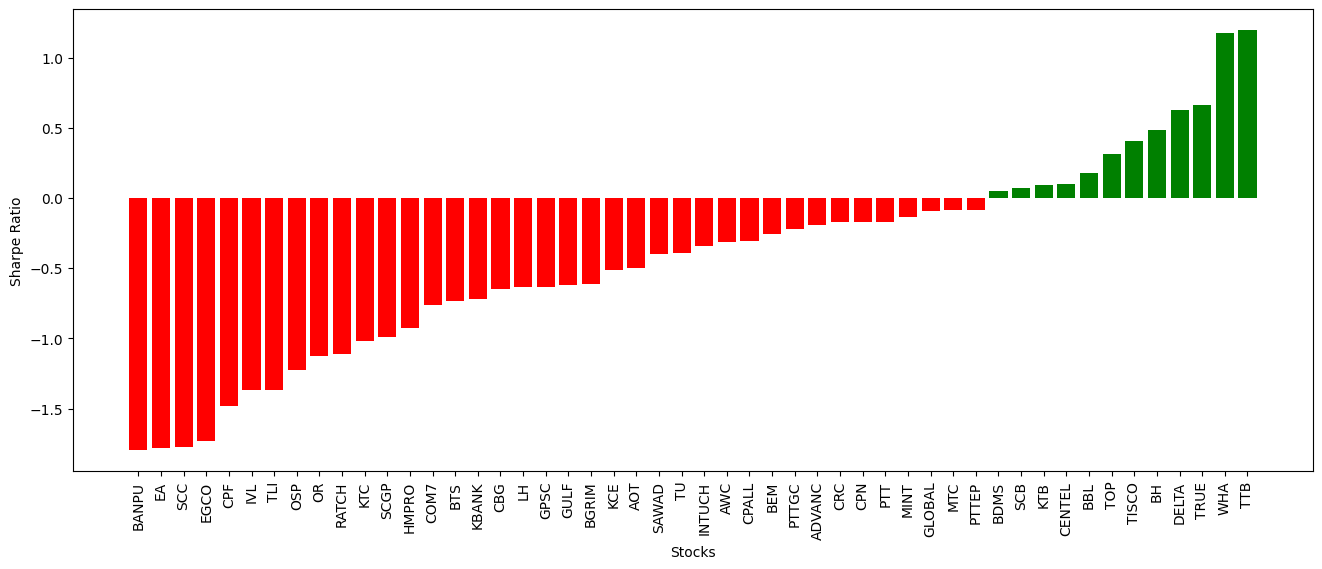

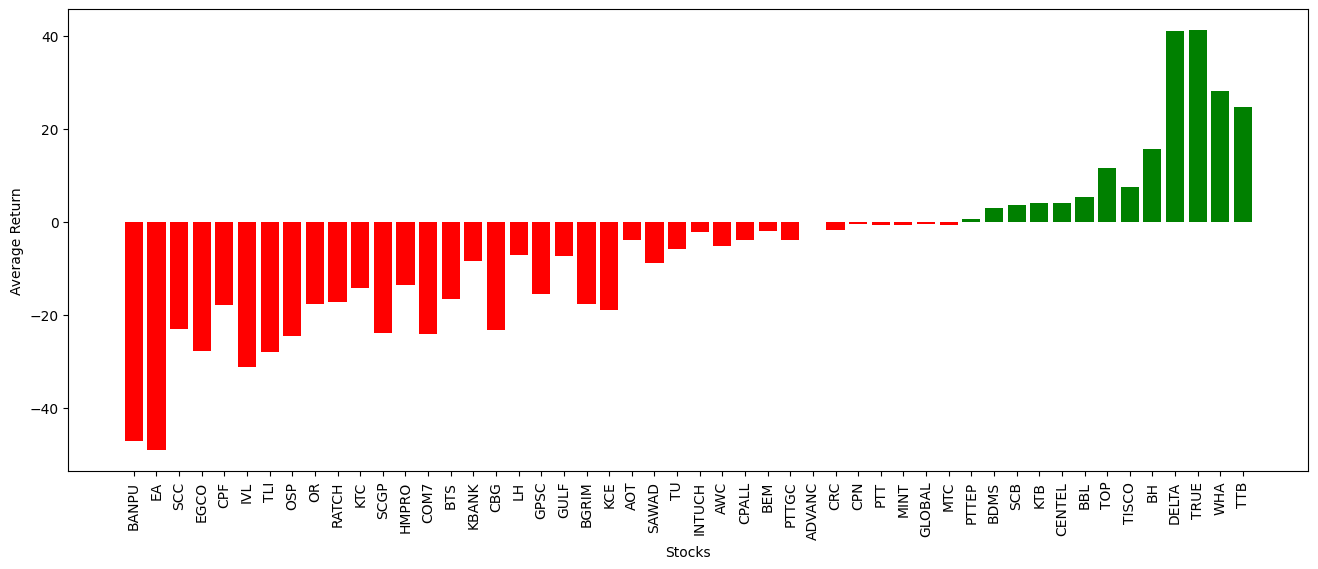

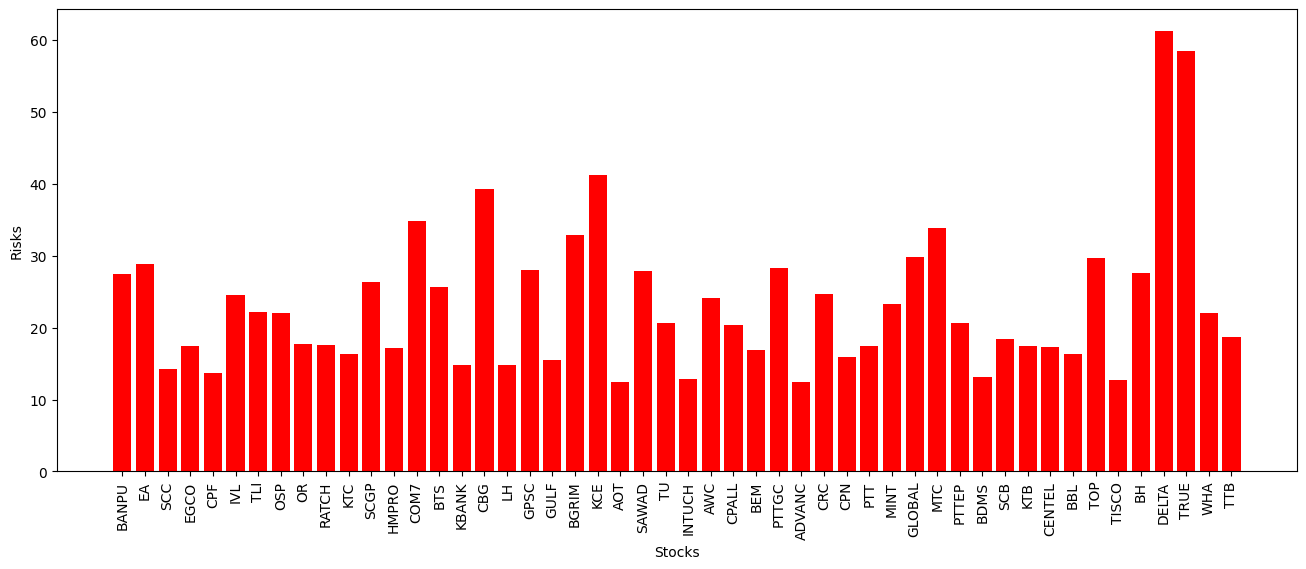

In [7]:
import matplotlib.pyplot as plt
conclu['sname'] = conclu['SET50'].str[4:]
plt.figure(figsize=(16,6))
colors = ['red' if x <0 else 'green' for x in conclu['sharpe']]
plt.bar(conclu['sname'], conclu['sharpe'],color = colors)
plt.xlabel('Stocks')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=90)
plt.show()

conclu['sname'] = conclu['SET50'].str[4:]
plt.figure(figsize=(16,6))
colors = ['red' if x <0 else 'green' for x in conclu['avg_return']]
plt.bar(conclu['sname'], conclu['avg_return'],color = colors)
plt.xlabel('Stocks')
plt.ylabel('Average Return')
plt.xticks(rotation=90)
plt.show()

conclu['sname'] = conclu['SET50'].str[4:]
plt.figure(figsize=(16,6))
plt.bar(conclu['sname'], conclu['std'],color = 'red')
plt.xlabel('Stocks')
plt.ylabel('Risks')
plt.xticks(rotation=90)
plt.show()

Benchmark (SET50)

In [8]:
df_return['set50']
mean = df_return['set50'].mean() * 12
std = df_return['set50'].std() * sqrt(12)
set_sharpe = (mean - rf)/std
set_sharpe

-0.9435620556201842

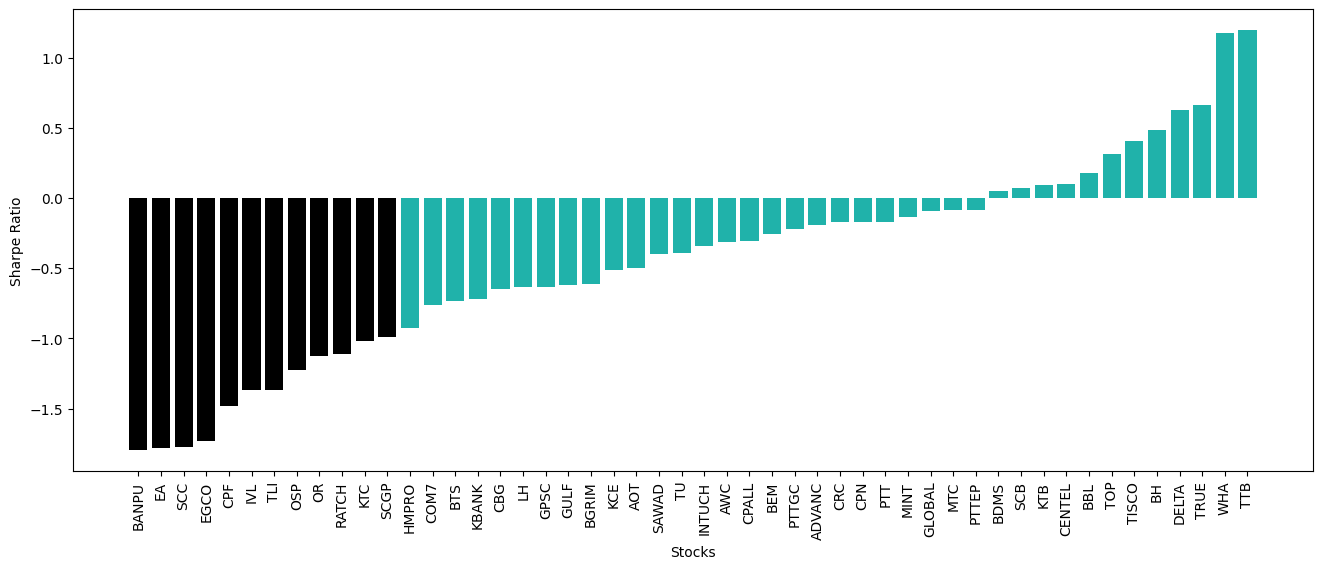

In [9]:
conclu['sname'] = conclu['SET50'].str[4:]
plt.figure(figsize=(16,6))
colors = ['black' if x <set_sharpe else 'lightseagreen' for x in conclu['sharpe']]
plt.bar(conclu['sname'], conclu['sharpe'],color = colors)
plt.xlabel('Stocks')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=90)
plt.show()